# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [246]:
# Library to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [247]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import library for open-source Python graphing of interactive visualizations
import plotly.express as px

# Display the matplot charts within the Notebook when code is executed
%matplotlib inline

### Understanding the structure of the data

In [248]:
# Set url data input file using Github
# NOTE: This is an alternative to reading files if network access via Google Drive is blocked.
url_data = "https://raw.githubusercontent.com/HelimaBass/Content_Drive/master/foodhub_order.csv?raw=true"

In [249]:
# Read the data
data = pd.read_csv(url_data)

In [250]:
# Generate copy of data to another variable to avoid any changes to the original data
df = data.copy()

In [251]:
# Return the first 5 rows in dataset
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [252]:
# Returns the last 5 rows in dataset
df.tail()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [253]:
# Determine number of rows and columns which is the shape of the dataset
df.shape

(1898, 9)

#### Observations:  
* There are 1,898 rows and 9 columns in the dataset.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [254]:
# Print a concise summary of the DataFrame using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* The columns each have 1,898 observations indicating there are no columns with null values in it.
* The columns of Dtype 'int64' are order_id, customer_id, food_preparation_time, and delivery_time.
* The columns of Dtype 'object' are restaurant_name, cuisine_type, day_of_the_week, and rating.  One or more of these columns with should potentially be changed to a different Dtype pending further interrogation of data values in each column.
* The columns of Dtype 'float' is cost_of_the_order.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [255]:
# Check the dataset for missing values
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [256]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
* The variables in this dataset have missing values or null values.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [257]:
# Generate the statistical summary for this dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [258]:
# Generate the statistical summary for this dataset to suppress scientific notation
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1898.00,1898.00,1898.00,1898.00,1898.00
mean,1477495.50,171168.48,16.50,27.37,24.16
std,548.05,113698.14,7.48,4.63,4.97
min,1476547.00,1311.00,4.47,20.00,15.00
25%,1477021.25,77787.75,12.08,23.00,20.00
50%,1477495.50,128600.00,14.14,27.00,25.00
75%,1477969.75,270525.00,22.30,31.00,28.00
max,1478444.00,405334.00,35.41,35.00,33.00


#### Observations:
* The minimum time it takes for food to be prepared is 20.00 minutes.
* The average (mean) time it takes for food to be prepared is 27.37 minutes.
* The maximum time it takes for food to be prepared is 35.00 minutes.

In [259]:
# Generate the statistical summary for this dataset to exclude numeric type columns
df.describe(exclude = 'number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


#### Observations:
* The are 178 unique values for restaurant_name with "Shake Shack" as the top one with a frequency of 219 occurrences in the dataset.
* The are 14 unique values for cuisine_type with "American" as the top one with a frequency of 584 occurrences in the dataset.
* The are 2 unique values for day_of_the_week with "Weekend" as the top one with a frequency of 1,351 occurrences in the dataset.
* The are 4 unique values for rating with "Not given" as the top one with a frequency of 736 occurrences in the dataset.

In [260]:
# Change columns with Dtype of object to category
df['restaurant_name'] = df['restaurant_name'].astype('category')
df['cuisine_type'] = df['cuisine_type'].astype('category')
df['day_of_the_week'] = df['day_of_the_week'].astype('category')
df['rating'] = df['rating'].astype('category')

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   category
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(4), float64(1), int64(4)
memory usage: 90.0 KB


### **Question 5:** How many orders are not rated? [1 mark]

In [262]:
# Write the code here
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:
* There are 736 rows in the dataset without a rating as represented by a value of "Not given"


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [263]:
# Generate a list displaying the number of unique values for each variable
df.nunique()

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

In [264]:
# Generate the number of unique values for order_id variable
df['order_id'].nunique()

1898

#### Observations:
* There are 1,898 unique values for order_id

In [265]:
# Generate the number of unique values for customer_id variable
df['customer_id'].nunique()

1200

#### Observations:
* There are 1200 unique values for order_id

In [266]:
# Generate the number of unique values for restaurant_name variable
df['restaurant_name'].nunique()

178

In [406]:
# Generate the restaurant name with the highest number of orders
print(f'The restaurant name with the highest number of orders is as follows:\n')

df_restaurant_top1 = df.groupby('restaurant_name')['order_id'].count().sort_values(ascending=False).reset_index()
print(df_restaurant_top1.head(1))

The restaurant name with the highest number of orders is as follows:

  restaurant_name  order_id
0     Shake Shack       219


In [268]:
plt.figure(figsize = (300,50))
sns.countplot(data=df, x="restaurant_name")
plt.show()

#### Observations:
* There are 178 unique values for restaurant_name with "Shake Shack" as the most frequent value appearing in the dataset

In [269]:
# Generate the number of unique values for cuisine_type
df['cuisine_type'].nunique()

14

In [335]:
# Generate a list of unique values for cuisine type in sorted order
print(f'The list of cuisine types are as follows:\n')

cuisine_list = sorted(df['cuisine_type'].unique())
for i in cuisine_list:
  print(f"> {i}")

The list of cuisine types are as follows:

> American
> Chinese
> French
> Indian
> Italian
> Japanese
> Korean
> Mediterranean
> Mexican
> Middle Eastern
> Southern
> Spanish
> Thai
> Vietnamese


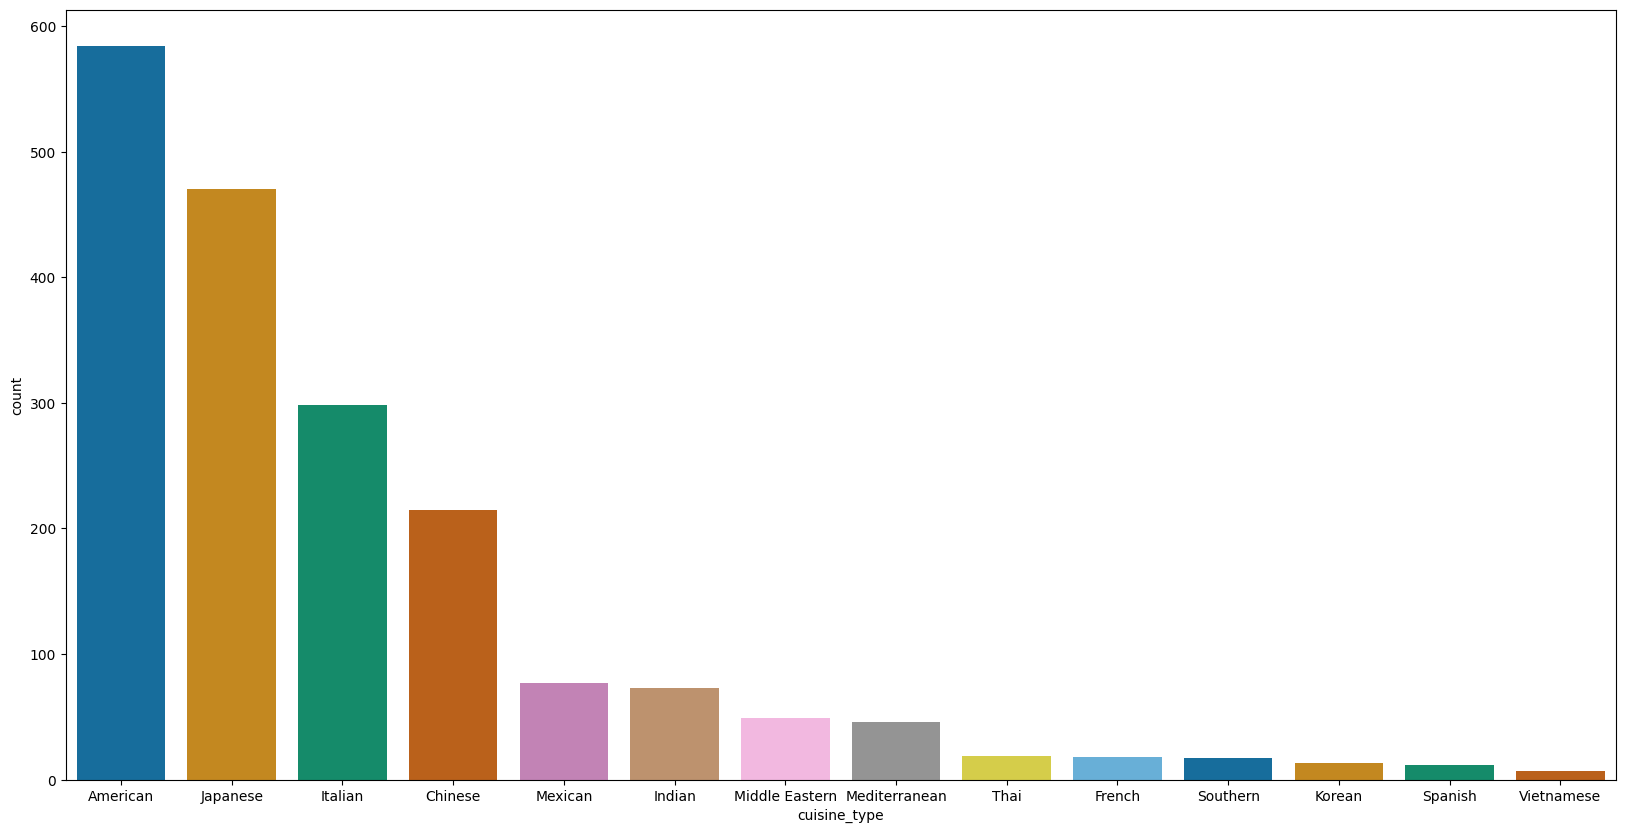

In [347]:
# Generate a bar graph for the cuisine_type variable sorted by highest to lowest counts
plt.figure(figsize = (20,10))
sns.countplot(data=df, x='cuisine_type', palette='colorblind', order= df['cuisine_type'].value_counts().index)
plt.show()

#### Observations:
* There are 14 unique values for cuisine_type with "American" as the most frequent value appearing in the dataset.

In [272]:
# Generate the number of unique values for cost_of_the_order variable
df['cost_of_the_order'].nunique()

312

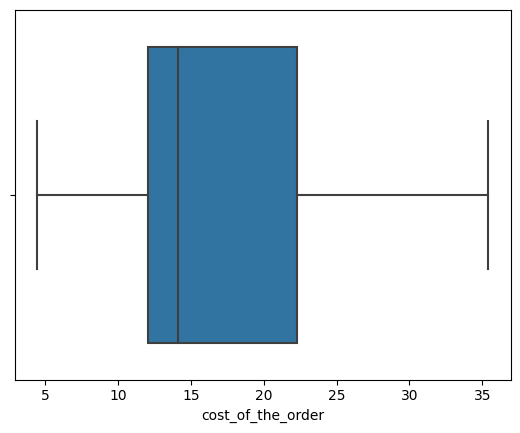

In [340]:
# Generate a box plot for the cost_of_the_order variable
sns.boxplot(data=df, x='cost_of_the_order')
plt.show()

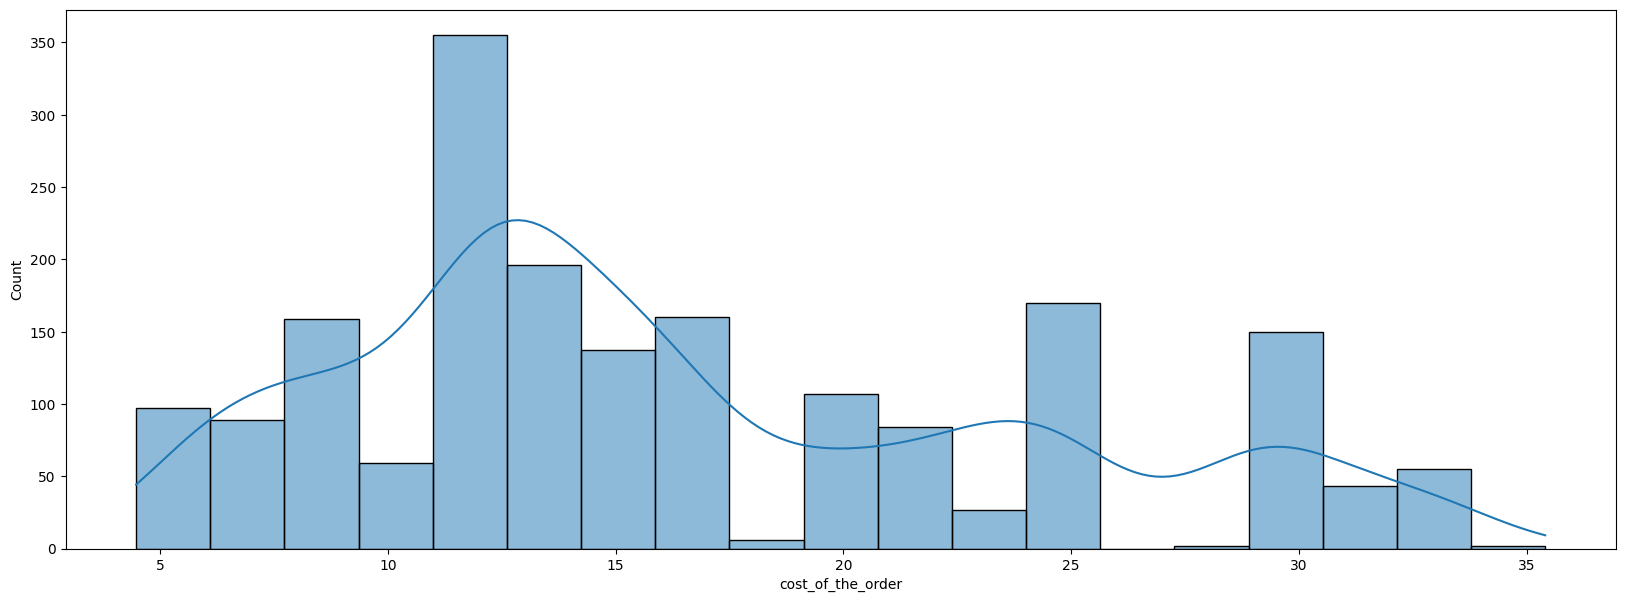

In [463]:
# Generate a histogram for the cost_of_the_order variable
plt.figure(figsize = (20,7))
sns.histplot(data=df, x='cost_of_the_order', kde=True)
plt.show()

#### Observations:
* There are 312 unique values for cost_of_the_order
* There does not appear to be any data outliers based on the boxplot of cost_of_the_order
* The distribution of data is positively skewed (skewed right) for cost_of_the_order

In [275]:
# Generate the number of unique values for day_of_the_week variable
df['day_of_the_week'].nunique()

2

In [334]:
# Generate a list of unique values for day of the week in sorted order
print(f'The list of day of the week is as follows:\n')

day_of_the_week_list = sorted(df['day_of_the_week'].unique())
for i in day_of_the_week_list:
  print(f"> {i}")

The list of day of the week is as follows:

> Weekday
> Weekend


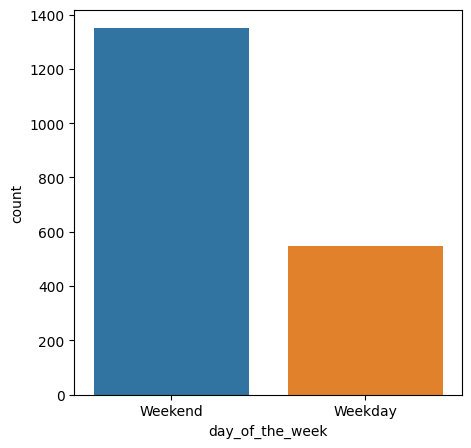

In [403]:
 # Generate a bar graph for the cuisine_type variable sorted by highest to lowest counts
plt.figure(figsize = (5,5))
sns.countplot(data=df, x='day_of_the_week', order= df['day_of_the_week'].value_counts().index)
plt.show()

#### Observations:
* There are 2 unique values for day_of_the_week with "Weekend" as the most frequent value appearing in the dataset

In [362]:
# Generate the number of unique values for rating variable
df['rating'].nunique()

4

In [384]:
# Generate a list of unique values for day of the week in sorted order
print(f'The list of rating is as follows:\n')

rating_list = sorted(df['rating'].unique())
print(rating_list)
for i in rating_list:
  print(f"> {i}")

The list of rating is as follows:

['3', '4', '5', 'Not given']
> 3
> 4
> 5
> Not given


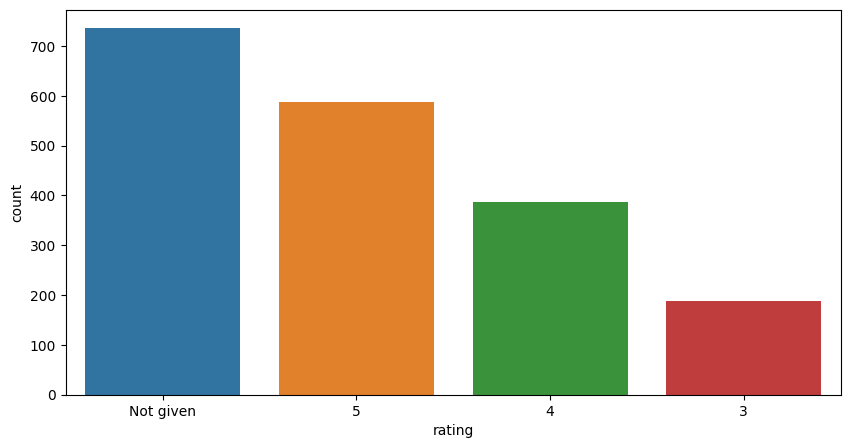

In [434]:
# Generate a bar graph for the rating variable
plt.figure(figsize = (10,5))
sns.countplot(data=df, x='rating', order= df['rating'].value_counts().index)
plt.show()


#### Observations:
* There are 2 unique values for rating with "Not given" as the most frequent value appearing in the dataset

In [337]:
# Generate the number of unique values for food_preparation_time variable
df['food_preparation_time'].nunique()

16

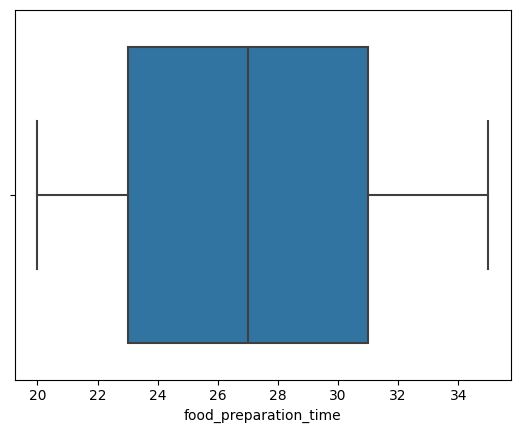

In [345]:
# Generate a box plot for the food_preparation_time variable
sns.boxplot(data=df, x='food_preparation_time')
plt.show()

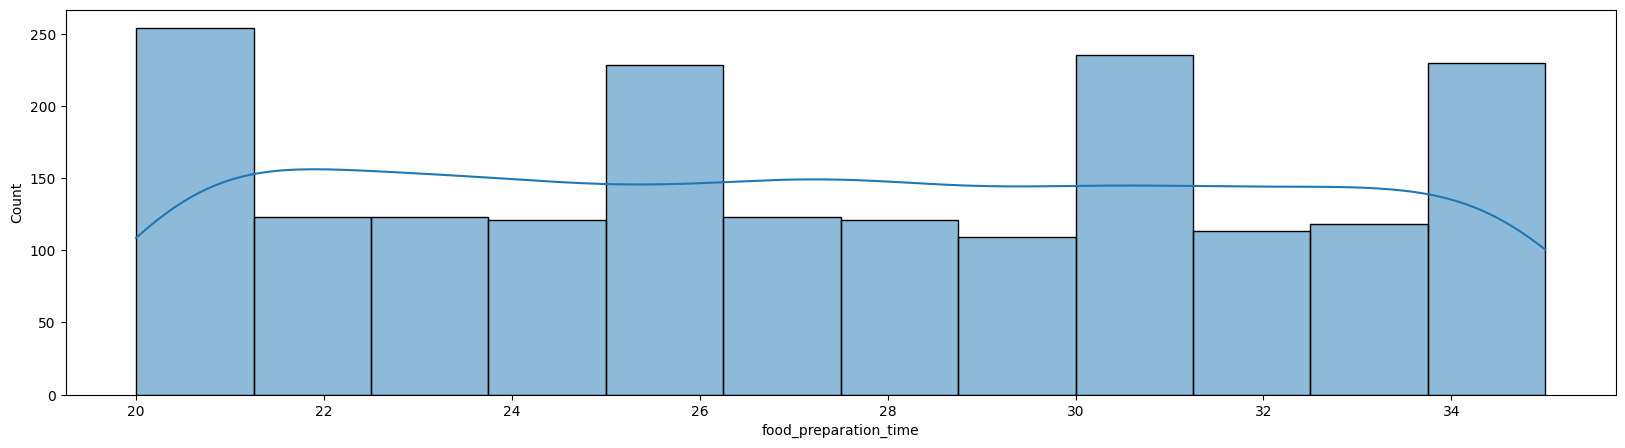

In [346]:
# Generate a histogram for the food_preparation_time variable
plt.figure(figsize = (20,5))
sns.histplot(data=df, x='food_preparation_time', kde=True)
plt.show()

#### Observations:
* There are 2 unique values for delivery
* There does not appear to be any data outliers based on the boxplot of food_preparation_time
* The distribution of data appears to display a normal distribution (or very close to it).
* There does not appear to be a bell-shaped curve of the data, but is rather close to a straight line curving down at the start and end points.


In [281]:
# Generate the number of unique values for delivery_time variable
df['delivery_time'].nunique()

19

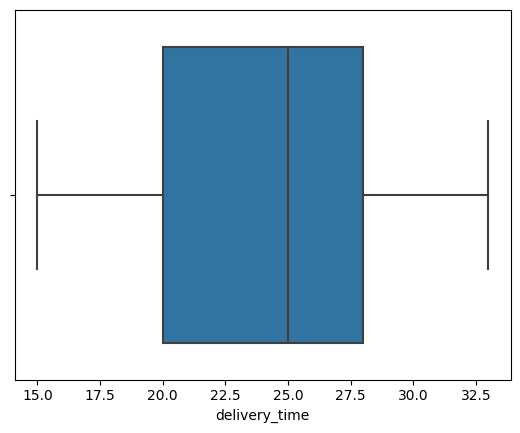

In [462]:
# Generate a box plot for the delivery_time variable
sns.boxplot(data=df, x='delivery_time')
plt.show()

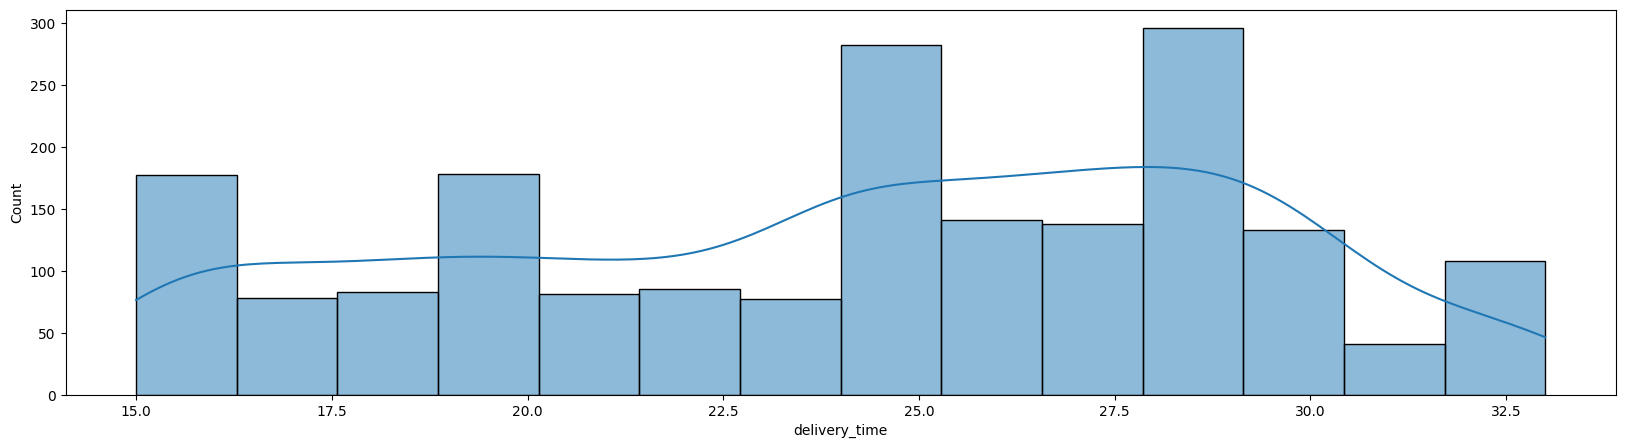

In [464]:
# Generate a histogram for the delivery_time variable
plt.figure(figsize = (20,5))
sns.histplot(data=df, x='delivery_time', kde=True)
plt.show()

#### Observations:
* There are 19 unique values for cost_of_the_order
* There does not appear to be any data outliers based on the boxplot of delivery_time
* The distribution of data appears to be negatively skewed (skewed left) for delivery_time

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [480]:
# Generate a list of the top 5 restaurants with number of orders from highest to lowest
df_top5_restaurants = df.restaurant_name.value_counts().head(5)
print(df_top5_restaurants.head())

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:

* The top 5 restaurants with the highest orders (in descending order) are as follows: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [481]:
# Generate a list of all orders placed during the weekend and count them by cuisine type
df_top5_wknd_cuisine = df[df.day_of_the_week=='Weekend'].cuisine_type.value_counts()

# Display most popular cuisine type for orders placed on weekends
print(df_top5_wknd_cuisine.head(5))

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64


#### Observations:
* The most popular cuisine on weekends are as follows:
  - American with 415 orders
  - Japanese with 335 orders
  - Italian with 207 orders
  - Chinese with 163 orders
  - Mexican with 53 orders

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [465]:
# Extract total number of orders
orders_total = len(df)

# Extract total number of orders with cost greater than 20 dollars
orders_over_20 = len(df[df.cost_of_the_order > 20])

# Calculate percentage of total orders with cost greater than 20 dollars in comparison to total number of orders
orders_over_20_pct = (orders_over_20/orders_total) * 100

# Display total percentage of orders with cost greater than 20 dollars rounded to 2 decimal places
print(f"The percentage of orders with cost exceeding $20 is {round(orders_over_20_pct,2)}%")

The percentage of orders with cost exceeding $20 is 29.24%


#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [460]:
# Write the code here
avg_delivery_time = df['delivery_time','order_id'].mean
print('The mean (average) order delivery time is', avg_delivery_time)

The mean (average) order delivery time is <bound method NDFrame._add_numeric_operations.<locals>.mean of 0       20
1       23
2       28
3       15
4       24
        ..
1893    17
1894    19
1895    24
1896    31
1897    24
Name: delivery_time, Length: 1898, dtype: int64>


#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [491]:
# Generate a list of all orders placed during the weekend and count them by cuisine type
df_top3_cust = df[['customer_id','order_id']].groupby('customer_id').count().sort_values(by='order_id', axis=0, ascending=False).head(3)
f_top3_cust = df[['customer_id','order_id']].groupby('customer_id').count().sort_values(by='order_id', axis=0, ascending=False).head(3)

# Display the 3 most customers that placed orders
df_top3_cust

,order_id
customer_id,
52832,13
47440,10
83287,9


#### Observations:
* The IDs associated with the three most frequent customers are as follows:
  - Customer ID: 52832 with 13 orders
  - Customer ID: 47440 with 10 orders
  - Customer ID: 83287 with 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


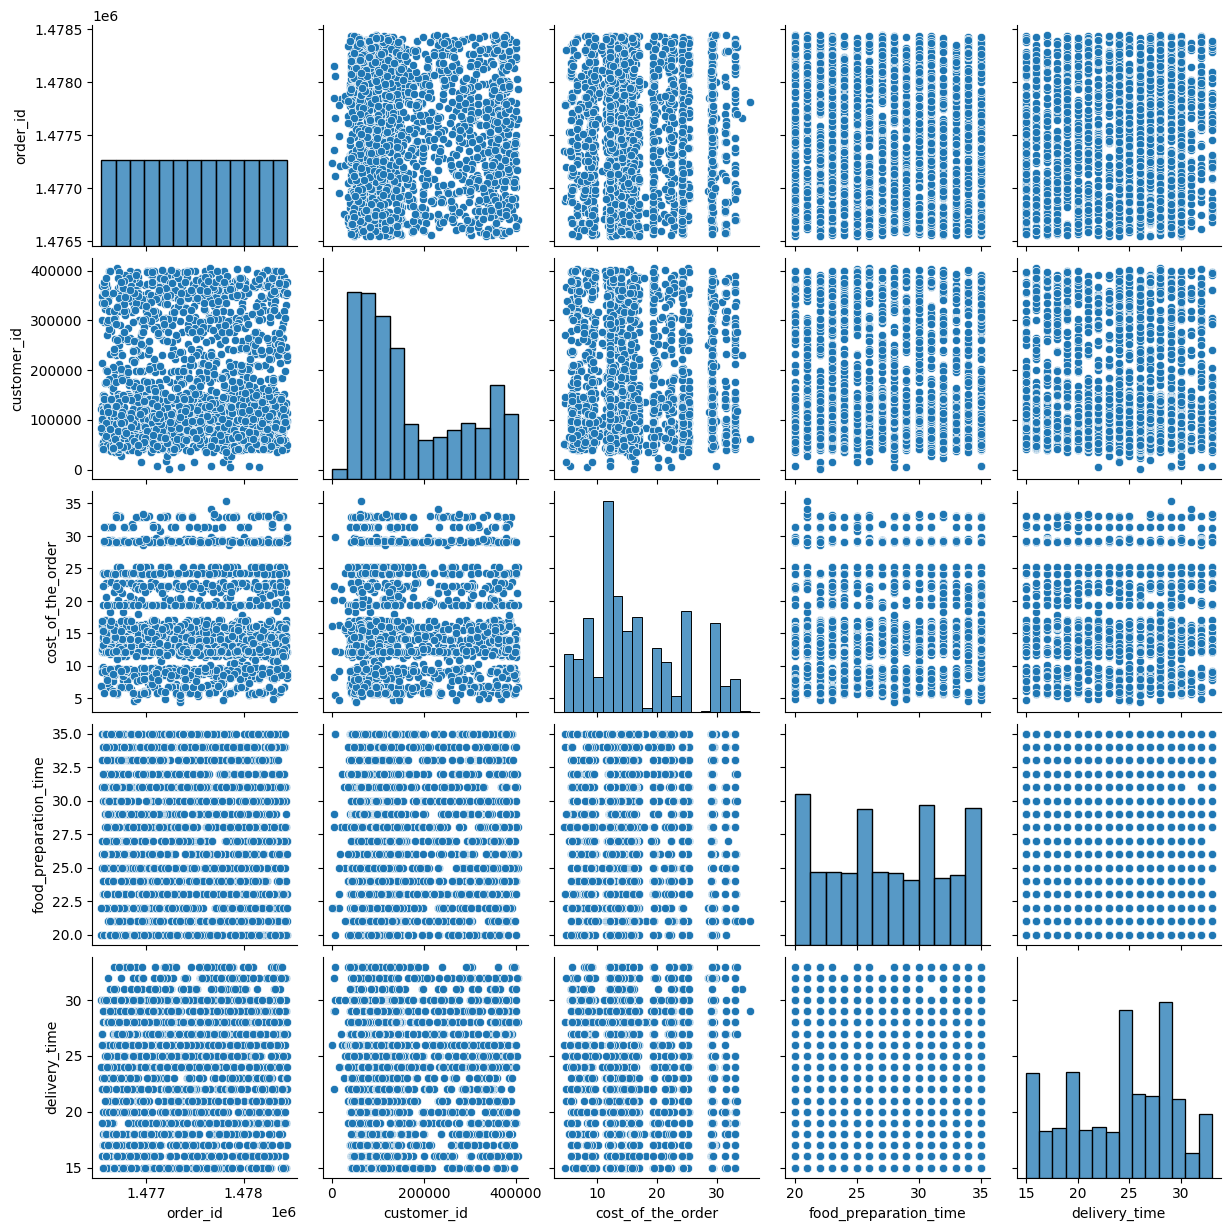

In [493]:
# Write the code here
sns.pairplot(data=df, corner=False);

#### Observations:

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [288]:
# Write the code here

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [289]:
# Write the code here

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [290]:
# Write the code here

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [291]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  